In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('../lib')

In [2]:
from glob import iglob

from ChemicalShift import ChemicalShift

work_dir = 'D:/work/lysine/Lysine/amy_stuff/Monomer/nh3+_nh2_coo-/PBE1PBE/DScan'

db_scan = {}
for angle in iglob(f'{work_dir}/*/nmr*.log'):
    file = ChemicalShift(angle)
    file.get_chemical_shift_from_nmr_out()
    atoms = file.get_atoms_object()
    db_scan[int(angle.split('/')[-1].split('\\')[1])] = [x.charge for x in atoms if x.symbol =='C']
    

In [3]:
list(db_scan.keys())

[0, 105, 120, 135, 15, 150, 165, 180, 30, 45, 60, 75, 90]

In [6]:
data = np.zeros((7,13))
angles = sorted(list(db_scan.keys()))
data[0] = angles

for i,angle in enumerate(angles):
    data[1:,i] = db_scan[angle]

In [9]:
np.savetxt('../data/chemical_shifts_alfa-1_scan.txt', data)

In [5]:
cm = 1/2.54  # centimeters in inches
plt.rcParams['figure.dpi'] = 200
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 8}

In [100]:
data[:,1][1:]

array([ 44.7309,  28.0157,  25.8476,  35.7365,  57.4893, 182.183 ])

In [117]:
carbons = list(reversed(['COO', 'C-α', 'C-β', 'C-γ', 'C-δ', 'C-ε', ]))
colors = ['#d53e4f','#fc8d59','#fee08b','#e6f598','#99d594','#3288bd']

In [112]:
order = [0,1,2,3,4,5]
order.sort(key=lambda x: -data[:,1][1:][x])
order

[5, 4, 0, 3, 1, 2]

Text(0.5, 0, 'α-1 angle')

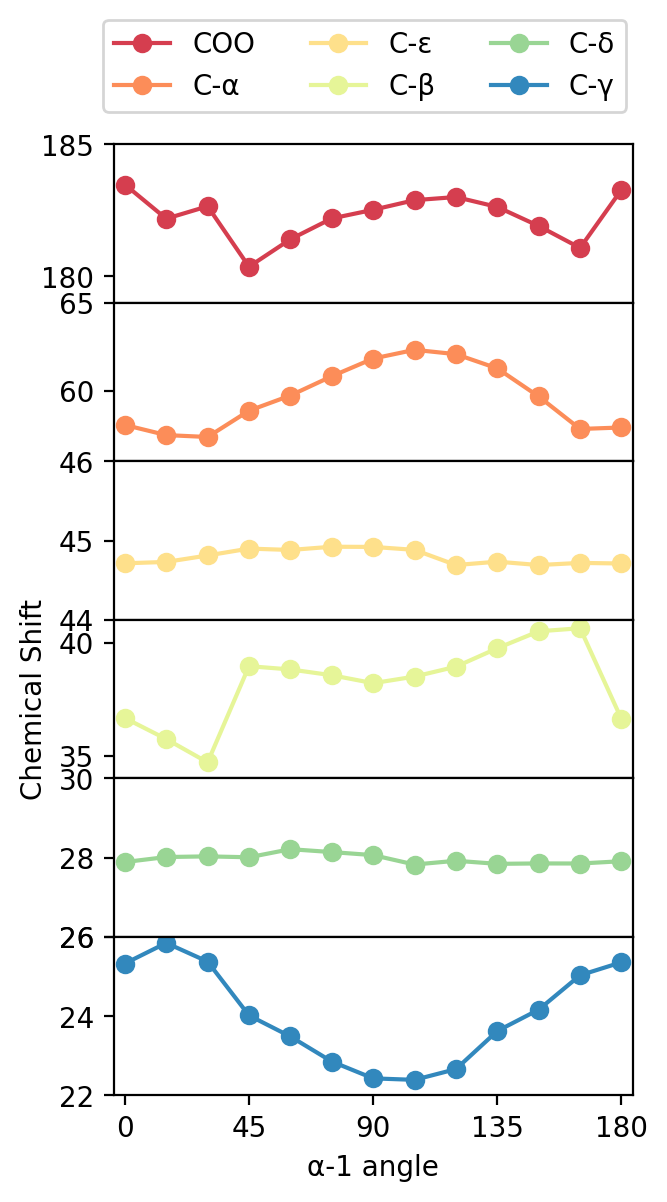

In [157]:
last = 6

fig, axis = plt.subplots(last, sharex=True, figsize=(8.5*cm,16*cm),gridspec_kw = {'wspace':0, 'hspace':0})

for i,o in enumerate(order):
    axis[i].plot(data[0], data[o+1], '-o', label = carbons[o], color=colors[i])

axis[-1].set_xlim(-4,184)
axis[-1].set_xticks([0,45,90,135,180])
fig.legend(bbox_to_anchor=(0.5, 0.98), loc='upper center', borderaxespad=0.05, ncol=3)

axis[0].set_ylim(179,185)
axis[1].set_ylim(56,65)
axis[2].set_ylim(44,46)
axis[3].set_ylim(34,41)
axis[4].set_ylim(26,30)
axis[5].set_ylim(22,26)
axis[3].set_ylabel('Chemical Shift')
axis[-1].set_xlabel('α-1 angle')


TypeError: 'AxesSubplot' object is not iterable

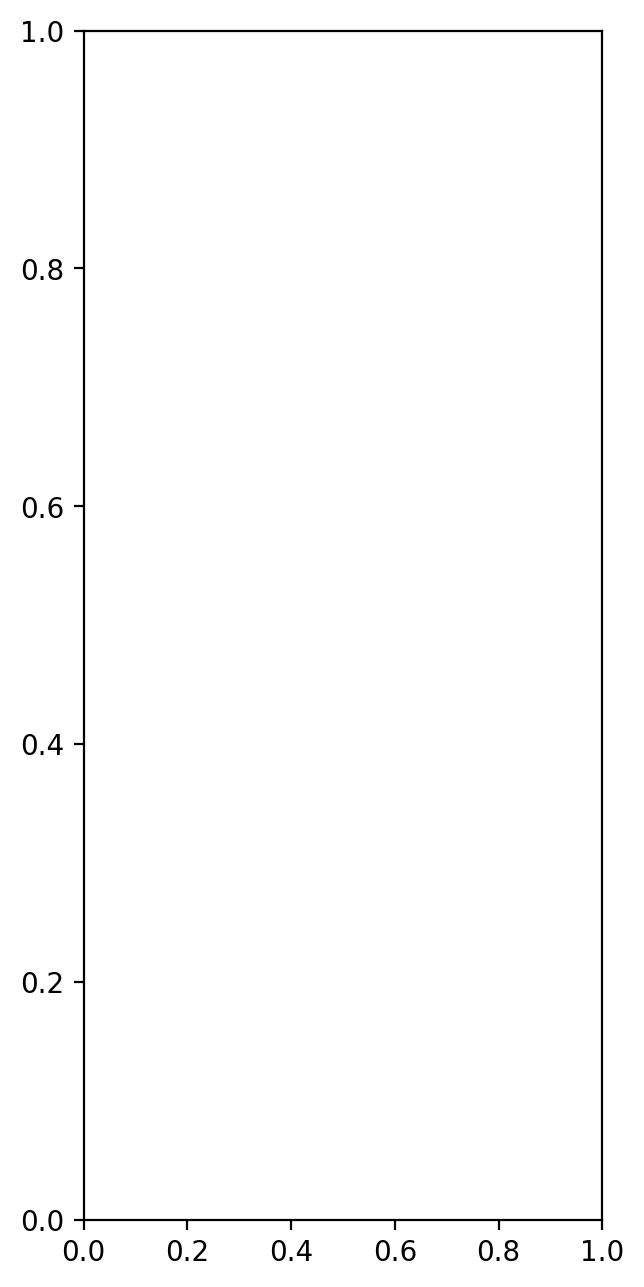

In [49]:
fig, axis = plt.subplots(1, sharex=True, figsize=(8.5*cm,20*cm))

i=1
for axes in axis:
    axes.plot(data[0], data[i])
    i+=1

(180.0, 185.0)

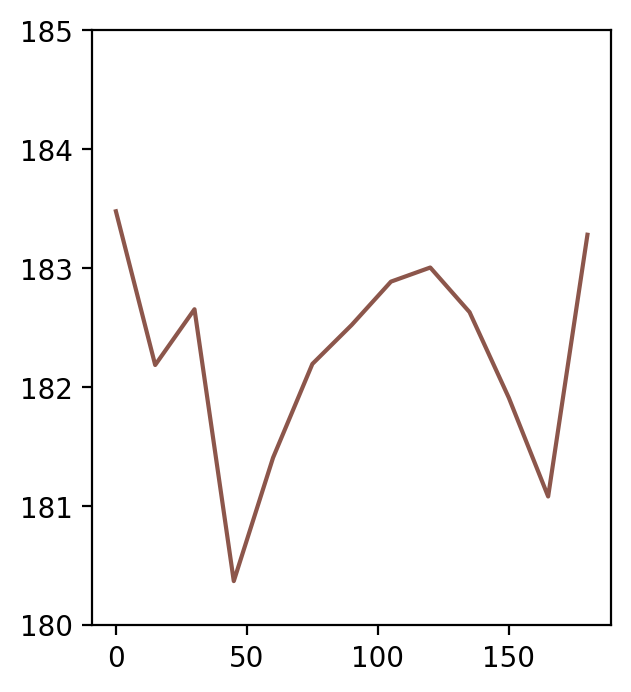

In [22]:
fig, ax = plt.subplots(1,figsize=(8.5*cm,10*cm))

angles = sorted([angle for angle in db_scan.keys()])

for axis in range(3):
    y = [db_scan[x][axis] for x in angles]
    ax.plot(angles,y)
    y = [db_scan[x][axis+3] for x in angles]
    ax.plot(angles,y)

ax.set_ylim(180,185)

In [5]:
db_scan

{0: [44.7132,
  27.8887,
  25.328599999999994,
  36.6635,
  58.06449999999998,
  183.4759],
 105: [44.883099999999985,
  27.825999999999993,
  22.393299999999982,
  38.494699999999995,
  62.329199999999986,
  182.8842],
 120: [44.69149999999999,
  27.9212,
  22.664199999999994,
  38.93129999999999,
  62.0838,
  183.00289999999998],
 135: [44.734099999999984,
  27.843500000000006,
  23.62559999999999,
  39.7458,
  61.2748,
  182.6276],
 15: [44.73089999999999,
  28.01569999999998,
  25.8476,
  35.73650000000001,
  57.489299999999986,
  182.183],
 150: [44.69139999999999,
  27.85409999999999,
  24.165099999999995,
  40.49449999999999,
  59.681,
  181.9067],
 165: [44.718500000000006,
  27.852100000000007,
  25.032700000000006,
  40.6301,
  57.8364,
  181.0771],
 180: [44.710999999999984,
  27.90979999999999,
  25.359999999999985,
  36.620900000000006,
  57.921400000000006,
  183.27859999999998],
 30: [44.81209999999999,
  28.032299999999992,
  25.377199999999988,
  34.707300000000004,
  